In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
train = pd.read_csv('train.csv',parse_dates=['DOB'])

In [144]:
train.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,target,address,postcode,state,country,property_valuation
0,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1,060 Morning Avenue,2016,NSW,Australia,10
1,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,0,6 Meadow Vale Court,2153,NSW,Australia,10
2,Talbot,missing,M,33,1961-10-03,missing,IT,Mass Customer,N,No,7.0,0,0 Holy Cross Court,4211,QLD,Australia,9
3,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,missing,Affluent Customer,N,Yes,8.0,0,17979 Del Mar Point,2448,NSW,Australia,4
4,Curr,Duckhouse,M,35,1966-09-16,missing,Retail,High Net Worth,N,Yes,13.0,0,9 Oakridge Court,3216,VIC,Australia,9


In [145]:
sns.set(style='darkgrid',font_scale=1.2)

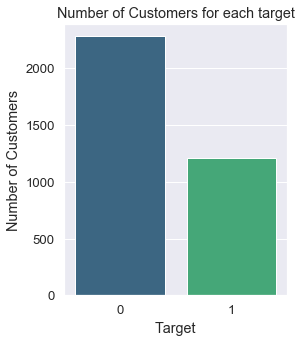

In [161]:
plt.figure(figsize=(4,5))
sns.countplot(train['target'],palette='viridis')
plt.xlabel('Target')
plt.ylabel('Number of Customers')
plt.title('Number of Customers for each target')
plt.savefig('figure11')

In [163]:
train['target'].value_counts()/len(train)

0    0.653196
1    0.346804
Name: target, dtype: float64

In [147]:
tar_value = train.groupby('gender')['target'].sum().values
tar_index = train.groupby('gender')['target'].sum().index

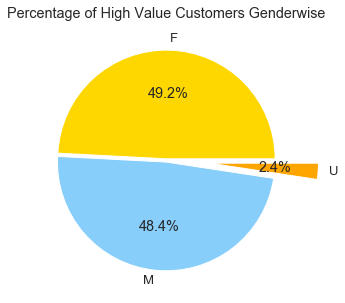

<Figure size 432x288 with 0 Axes>

In [148]:
plt.figure(figsize=(5,5))
plt.pie(tar_value,labels=tar_index,autopct='%1.1f%%',colors=['gold','lightskyblue','orange'],explode=(0.01,0.02,0.4))
plt.title('Percentage of High Value Customers Genderwise')
plt.show()
plt.savefig('figure2')

Text(0, 0.5, 'Count')

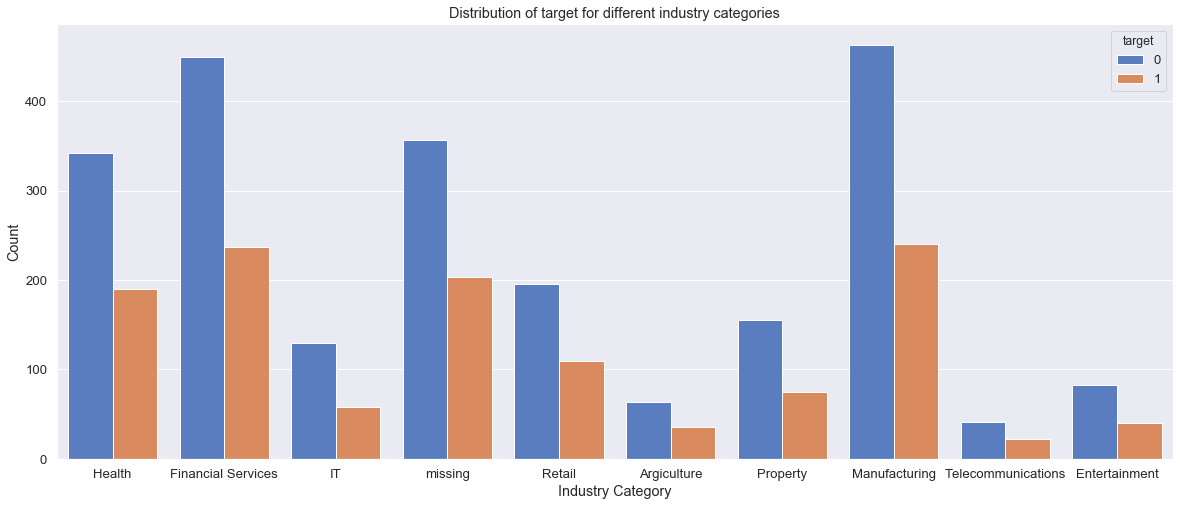

In [164]:
plt.figure(figsize=(20,8))
sns.countplot('job_industry_category',hue='target',data=train,palette='muted')
plt.title('Distribution of target for different industry categories')
plt.xlabel('Industry Category')
plt.ylabel('Count')

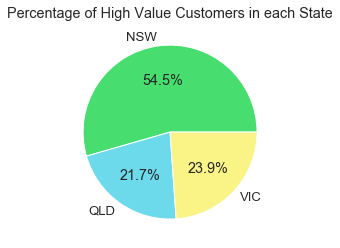

<Figure size 432x288 with 0 Axes>

In [150]:
state_value = train.groupby('state')['target'].sum().values
state_index = train.groupby('state')['target'].sum().index

plt.pie(state_value,labels=state_index,autopct='%1.1f%%',colors=['#47de6f','#6cdaeb','#faf487'])
plt.title('Percentage of High Value Customers in each State')
plt.show()

Text(0.5, 1.0, 'Property Valuation vs Target')

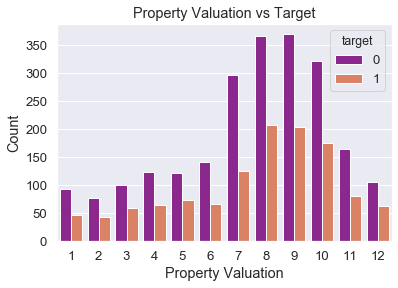

In [165]:
sns.countplot(train['property_valuation'],hue=train['target'],palette='plasma')
plt.xlabel('Property Valuation')
plt.ylabel('Count')
plt.title('Property Valuation vs Target')

Text(0.5, 1.0, 'Tenure vs Target')

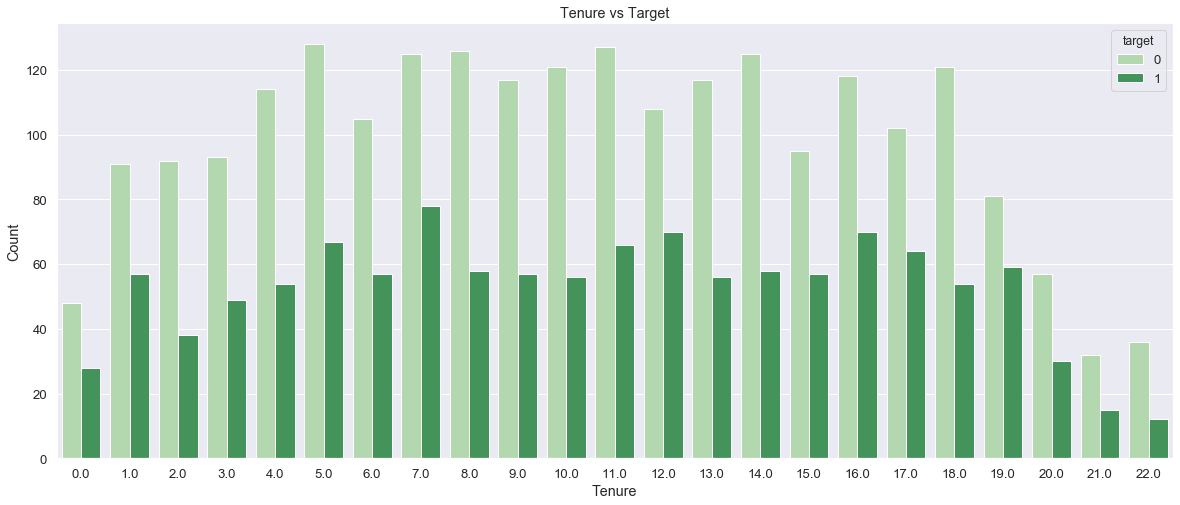

In [166]:
plt.figure(figsize=(20,8))
sns.countplot(train['tenure'],hue=train['target'],palette='Greens')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Tenure vs Target')

In [153]:
top_10_postcodes = train['postcode'].value_counts()[:10].index

In [154]:
postcode_index = train.groupby('postcode')['target'].sum().to_frame().sort_values('target',ascending=False)[:15].index
postcode_target = train.groupby('postcode')['target'].sum().to_frame().sort_values('target',ascending=False)[:15]['target']

Text(0, 0.5, 'Number of High Value Customers')

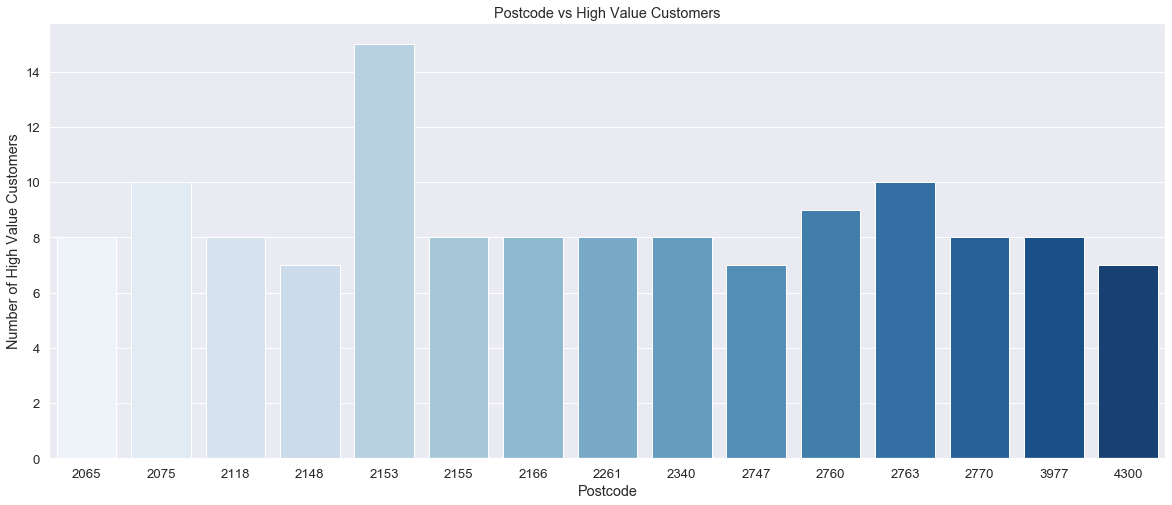

In [167]:
# sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.barplot(postcode_index,postcode_target,palette='Blues')
plt.title('Postcode vs High Value Customers')
plt.xlabel('Postcode')
plt.ylabel('Number of High Value Customers')

In [156]:
tar_past_index = train.groupby('target')['past_3_years_bike_related_purchases'].mean().index
tar_past_value = train.groupby('target')['past_3_years_bike_related_purchases'].mean().values

Text(0.5, 1.0, 'Past 3 years bike related purchases vs Target')

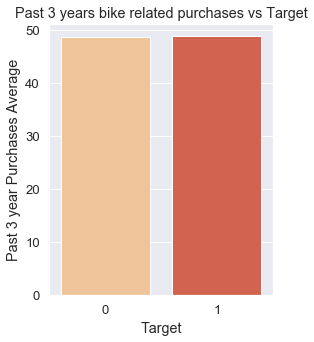

In [173]:
plt.figure(figsize=(4,5))
sns.barplot(tar_past_index,tar_past_value,palette='OrRd')
plt.ylabel('Past 3 year Purchases Average')
plt.xlabel('Target')
plt.title('Past 3 years bike related purchases vs Target')

In [158]:
mass_0 = len(train.loc[(train['target']==0)&(train['wealth_segment']=='Mass Customer')])
mass_1 = len(train.loc[(train['target']==1)&(train['wealth_segment']=='Mass Customer')])

aff_0 = len(train.loc[(train['target']==0)&(train['wealth_segment']=='Affluent Customer')])
aff_1 = len(train.loc[(train['target']==1)&(train['wealth_segment']=='Affluent Customer')])

high_0 = len(train.loc[(train['target']==0)&(train['wealth_segment']=='High Net Worth')])
high_1 = len(train.loc[(train['target']==1)&(train['wealth_segment']=='High Net Worth')])

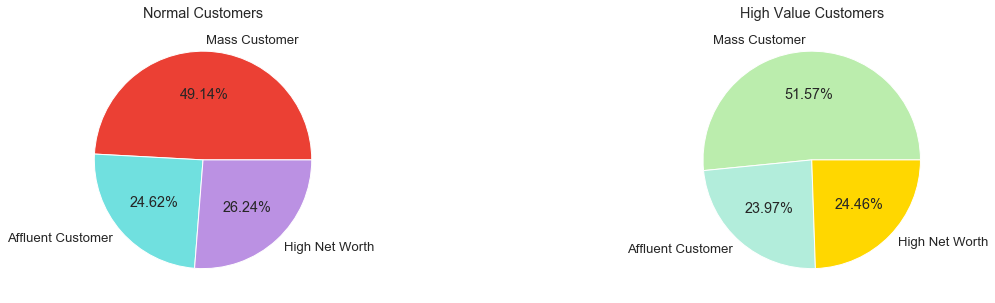

In [159]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

ax[0].pie([mass_0,aff_0,high_0],labels=['Mass Customer','Affluent Customer','High Net Worth'],autopct='%1.2f%%',colors = ['#eb4034','#70e0df','#bb91e3'])
ax[1].pie([mass_1,aff_1,high_1],labels=['Mass Customer','Affluent Customer','High Net Worth'],autopct='%1.2f%%',colors = ['#bbedad','#b2eddb','gold'])
ax[0].set_title('Normal Customers')
ax[1].set_title('High Value Customers')
